In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('windpro.csv', encoding='utf-8',index_col='Date/Time',parse_dates=True)

In [6]:

df=df.dropna()
df.shape
print(df.head())

                  100m_N Avg [m/s]  100m_S Avg [m/s]  80m Avg [m/s]  \
Date/Time                                                             
01-12-2018 00:00            10.654            10.809          5.182   
01-12-2018 00:10            10.531            10.688          5.334   
01-12-2018 00:20             9.976            10.110          5.319   
01-12-2018 00:30             9.617             9.735          5.319   
01-12-2018 00:40             9.001             9.112          5.363   

                  50m Avg [m/s]  20m Avg [m/s]  Pressure 5m [mbar]  \
Date/Time                                                            
01-12-2018 00:00          7.096          4.852              1012.2   
01-12-2018 00:10          7.415          4.953              1012.1   
01-12-2018 00:20          7.398          4.796              1012.2   
01-12-2018 00:30          7.430          4.749              1012.1   
01-12-2018 00:40          7.344          4.833              1012.0   

           

In [8]:
df['100m_N Avg [m/s]'].fillna(0, inplace=True)
df = df.dropna(subset=['100m_N Avg [m/s]'])
df

,100m_N Avg [m/s],100m_S Avg [m/s],80m Avg [m/s],50m Avg [m/s],20m Avg [m/s],Pressure 5m [mbar],98m WV [ÃÂÃÂ°],78m WV [ÃÂÃÂ°],48m WV [ÃÂÃÂ°],Temp 5m [ÃÂÃÂ°C],Hum 5m
Date/Time,,,,,,,,,,,
01-12-2018 00:00,10.654,10.809,5.182,7.096,4.852,1012.2,52.0,45.0,29.5,22.5,46.5
01-12-2018 00:10,10.531,10.688,5.334,7.415,4.953,1012.1,53.4,47.8,32.3,22.2,47.5
01-12-2018 00:20,9.976,10.110,5.319,7.398,4.796,1012.2,53.4,46.4,29.5,22.1,48.3
01-12-2018 00:30,9.617,9.735,5.319,7.430,4.749,1012.1,52.0,46.4,30.9,22.2,48.5
01-12-2018 00:40,9.001,9.112,5.363,7.344,4.833,1012.0,53.4,47.8,32.3,22.2,49.0
...,...,...,...,...,...,...,...,...,...,...,...
23-06-2019 04:50,5.759,8.894,5.602,4.716,3.281,998.5,275.6,267.2,258.8,26.8,89.0
23-06-2019 05:00,5.638,7.597,5.403,4.691,3.428,998.5,277.0,267.2,260.2,26.8,89.2
23-06-2019 05:10,5.707,1.745,5.329,4.221,2.941,998.5,284.1,275.6,268.6,26.8,89.4


<Axes: xlabel='Date/Time'>

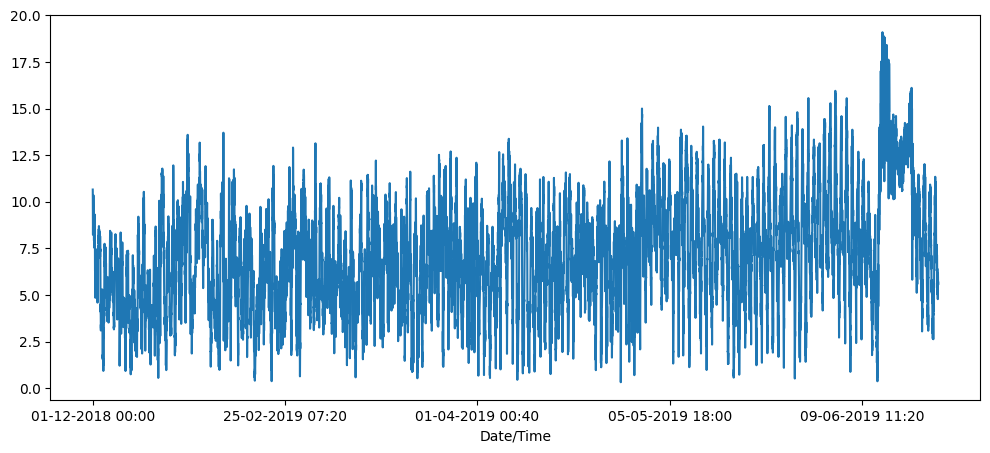

In [10]:
df['100m_N Avg [m/s]'].plot(figsize=(12,5))           

In [12]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print("1.ADF:",dftest[0])
    print("2.p_value:",dftest[1])
    print("3.num of lags:",dftest[2])
    print("4.num of observations used for ADF REGRESSION and critical value calculation:",dftest[3])
    print("5.critical values:")
    for key,val in dftest[4].items():
        print("\t",key,": ",val)
ad_test(df['100m_N Avg [m/s]'])

1.ADF: -16.713839802437615
2.p_value: 1.4271773624844412e-29
3.num of lags: 33
4.num of observations used for ADF REGRESSION and critical value calculation: 21948
5.critical values:
	 1% :  -3.43064797999693
	 5% :  -2.861671697329763
	 10% :  -2.566840098778218


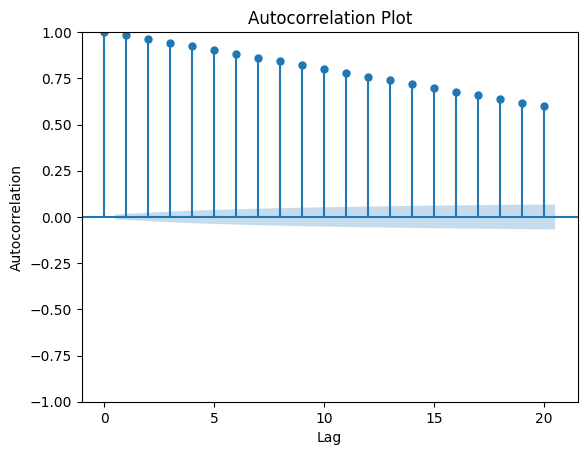

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['100m_N Avg [m/s]'], lags=20) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

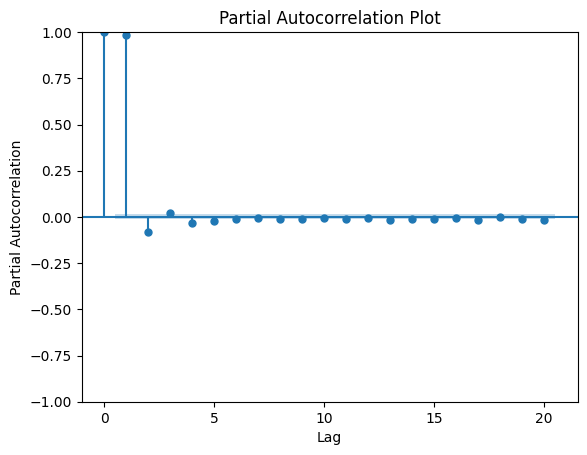

In [16]:
plot_pacf(df['100m_N Avg [m/s]'], lags=20) 
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot')
plt.show()

In [17]:
from pmdarima import auto_arima

In [20]:
stepwise_fit=auto_arima(df['100m_N Avg [m/s]'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=36806.135, Time=40.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=36949.196, Time=4.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=36828.530, Time=1.84 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=36821.007, Time=4.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=36947.200, Time=0.95 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=36805.983, Time=24.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=36807.039, Time=4.62 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=36804.076, Time=8.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=36805.968, Time=14.88 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=36810.523, Time=3.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=36802.080, Time=3.81 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=36819.010, Time=1.52 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=36826.533, Time=1.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=36803.972, Time=7.15 sec
 ARIMA(1,1,2)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                21982
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -18398.040
Date:                Thu, 05 Jun 2025   AIC                          36802.080
Time:                        07:47:36   BIC                          36826.073
Sample:                             0   HQIC                         36809.894
                              - 21982                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3316      0.048     -6.913      0.000      -0.426      -0.238
ma.L1          0.4095      0.047      8.731      0.000       0.318       0.501
sigma2         0.3123      0.002    204.620      0.000       0.309       0.315
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             33577.61
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
print(df.shape)
train = df.iloc[:-100] 
test=df.iloc[-100:]
print(train.shape,test.shape)

(21982, 11)
(21882, 11) (100, 11)


In [24]:
model=ARIMA(train['100m_N Avg [m/s]'],order=(1,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       100m_N Avg [m/s]   No. Observations:                21882
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -18338.321
Date:                Thu, 05 Jun 2025   AIC                          36682.641
Time:                        07:47:49   BIC                          36706.621
Sample:                             0   HQIC                         36690.453
                              - 21882                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3324      0.048     -6.959      0.000      -0.426      -0.239
ma.L1          0.4106      0.047      8.797      0.000       0.319       0.502
sigma2         0.3130      0.002    204.116      0.000       0.310       0.316
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             33385.26
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
start=len(train)-100
end=len(train)-100+len(test)-1
pred=model.predict(start=start, end=end,typ='levels')
pred.index=df.index[start:end+1]
pred

Date/Time
21-06-2019 20:20    9.726066
21-06-2019 20:30    8.640003
21-06-2019 20:40    8.066646
21-06-2019 20:50    8.731541
21-06-2019 21:00    9.140905
                      ...   
22-06-2019 12:10    5.913724
22-06-2019 12:20    6.513627
22-06-2019 12:30    6.970986
22-06-2019 12:40    7.276726
22-06-2019 12:50    7.769958
Name: predicted_mean, Length: 100, dtype: float64

<Axes: xlabel='Date/Time'>

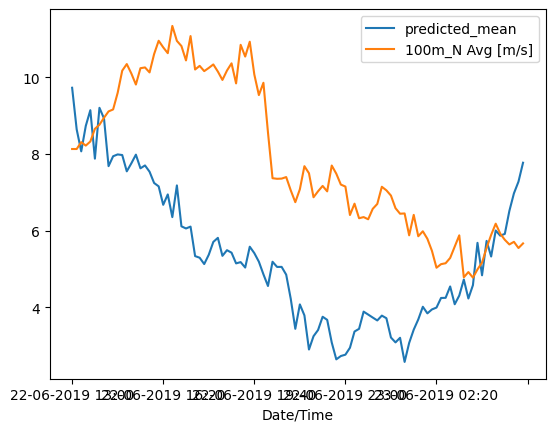

In [28]:
pred.plot(legend=True)
test['100m_N Avg [m/s]'].plot(legend=True)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test['100m_N Avg [m/s]'], pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 10.186471388337697


In [32]:
mae = mean_absolute_error(test['100m_N Avg [m/s]'], pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 2.759972981345756


In [34]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 3.191625195466676


In [36]:
df.tail()

,100m_N Avg [m/s],100m_S Avg [m/s],80m Avg [m/s],50m Avg [m/s],20m Avg [m/s],Pressure 5m [mbar],98m WV [ÃÂÃÂ°],78m WV [ÃÂÃÂ°],48m WV [ÃÂÃÂ°],Temp 5m [ÃÂÃÂ°C],Hum 5m
Date/Time,,,,,,,,,,,
23-06-2019 04:50,5.759,8.894,5.602,4.716,3.281,998.5,275.6,267.2,258.8,26.8,89.0
23-06-2019 05:00,5.638,7.597,5.403,4.691,3.428,998.5,277.0,267.2,260.2,26.8,89.2
23-06-2019 05:10,5.707,1.745,5.329,4.221,2.941,998.5,284.1,275.6,268.6,26.8,89.4
23-06-2019 05:20,5.545,2.098,5.001,4.020,2.828,998.5,293.9,288.3,285.5,26.8,89.6
23-06-2019 05:30,5.665,1.003,5.116,4.076,2.747,998.5,288.3,282.7,275.6,26.6,89.8


In [19]:
index_future_dates=pd.date_range(start='2019-06-23',end='2019-06-30 ')
index_future_dates

DatetimeIndex(['2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26',
               '2019-06-27', '2019-06-28', '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', freq='D')

In [20]:
pred=model.predict(start=len(df),end=len(df)+7,typ='levels').rename('ARIMA Prediction')
pred.index=index_future_dates

In [21]:
pred

2019-06-23    5.681011
2019-06-24    5.675702
2019-06-25    5.677462
2019-06-26    5.676879
2019-06-27    5.677072
2019-06-28    5.677008
2019-06-29    5.677029
2019-06-30    5.677022
Freq: D, Name: ARIMA Prediction, dtype: float64

<AxesSubplot:>

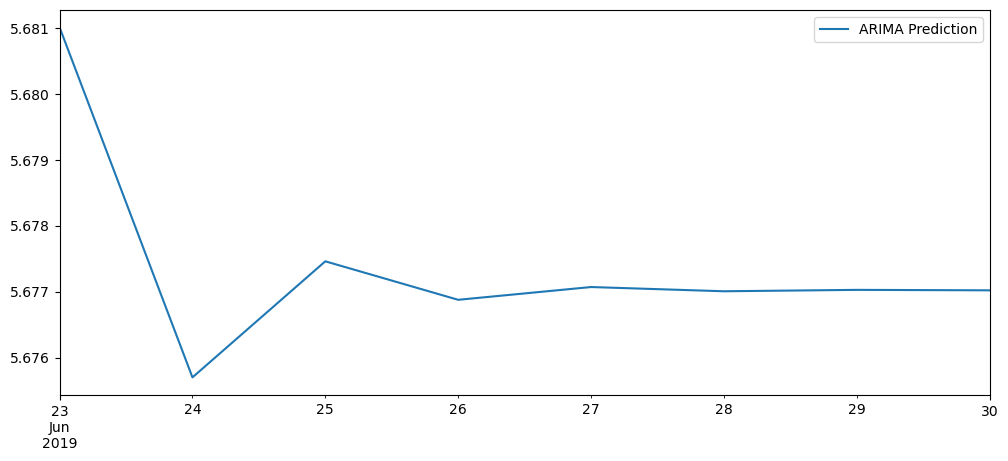

In [22]:
pred.plot(figsize=(12,5),legend=True)